# **Time-Series analysis explained and hands-on with real data**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import numpy as np



#DataSet Split
from sklearn.model_selection import TimeSeriesSplit
#Gradient Boosting
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor



from sklearn.model_selection import cross_validate
#Naive Linear Regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV
import numpy as np
#Trigonometric features
from sklearn.preprocessing import FunctionTransformer
#Periodic Spline Features
from sklearn.preprocessing import SplineTransformer
#Pairwise interactions with splines and polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import FeatureUnion
#Non-Linear feature interactions with kernels
from sklearn.kernel_approximation import Nystroem

C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df = pd.read_csv('time_series.csv')

# **Exploratory Data Analysis**

In [3]:
df


,ID,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_per_day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,34,19,jan,Monday,2,118,10,10,37,308593,...,0,1,0,0,0,0,83,172,28,1
1,34,27,jan,Monday,2,118,10,10,37,308593,...,0,1,0,0,0,0,83,172,28,2
2,34,27,jan,Monday,2,118,10,10,37,308593,...,0,1,0,0,0,0,83,172,28,2
3,34,27,jan,Monday,2,118,10,10,37,308593,...,0,1,0,0,0,0,83,172,28,0
4,34,19,jan,Monday,2,118,10,10,37,330061,...,0,1,0,0,0,0,83,172,28,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,3,28,dec,Friday,4,179,51,18,38,236629,...,0,1,0,1,0,0,89,170,31,1
736,22,13,dec,Friday,4,179,26,9,30,280549,...,0,3,0,0,0,0,56,171,19,1
737,28,23,dec,Friday,4,225,26,9,28,280549,...,0,1,1,0,0,2,69,169,24,3
738,17,18,dec,Friday,4,179,22,17,40,280549,...,0,2,2,0,1,0,63,170,22,2


In [4]:
df.shape

(740, 21)

Our dataset has 740 rowns and 21 columns.

In [5]:
print(df.columns)

Index(['ID', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average_per_day ', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')


Max absent time: 120
Min absent time: 0
Mean absent time:  1.018918918918919
SD absent time:  1.0977465462994382


<AxesSubplot:xlabel='absenteeism_time_in_hours', ylabel='Density'>

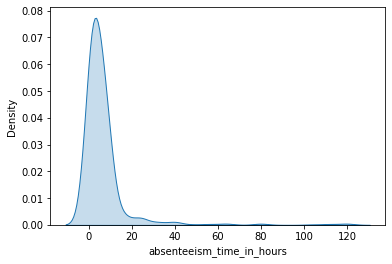

In [6]:
#Check max and min for some variables (columns) and their distribution:
print("Max absent time:", df["absenteeism_time_in_hours"].max())
print("Min absent time:", df["absenteeism_time_in_hours"].min())

print("Mean absent time: ", df["son"].mean())
print("SD absent time: ", statistics.pstdev(df["son"]))

sns.kdeplot(df["absenteeism_time_in_hours"], shade=True)

We can do the same for the other numerical variables and obtain a density plot of their distributions. The final result will look this way:


Max transportation expense: 388
Min transportation expense: 118


<AxesSubplot:xlabel='transportation_expense', ylabel='Density'>

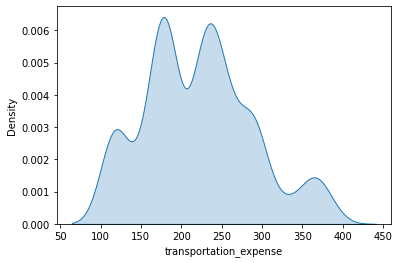

In [7]:
print("Max transportation expense:", df["transportation_expense"].max())
print("Min transportation expense:", df["transportation_expense"].min())
sns.kdeplot(df["transportation_expense"], shade=True)

Max service time: 29
Min service time: 1


<AxesSubplot:xlabel='service_time', ylabel='Density'>

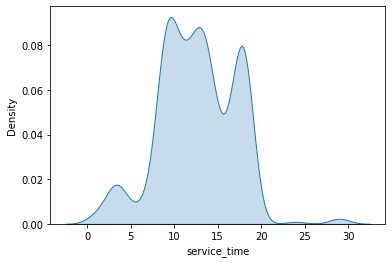

In [8]:
print("Max service time:", df["service_time"].max())
print("Min service time:", df["service_time"].min())
sns.kdeplot(df["service_time"], shade=True)

Max distance to work: 52
Min distance to work: 5


<AxesSubplot:xlabel='distance_from_residence_to_work', ylabel='Density'>

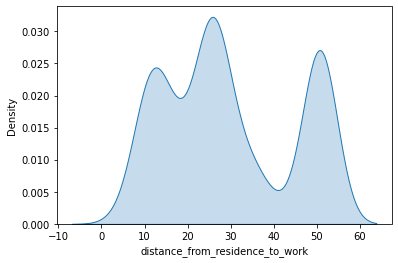

In [9]:
print("Max distance to work:", df["distance_from_residence_to_work"].max())
print("Min distance to work:", df["distance_from_residence_to_work"].min())
sns.kdeplot(df["distance_from_residence_to_work"], shade=True)

Max age: 58
Min age: 27


<AxesSubplot:xlabel='age', ylabel='Density'>

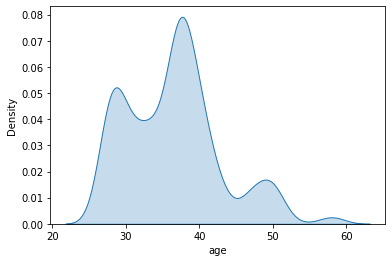

In [10]:
print("Max age:", df["age"].max())
print("Min age:", df["age"].min())
sns.kdeplot(df["age"], shade=True)

Max workload: 378884
Min workload: 205917


<AxesSubplot:xlabel='work_load_average_per_day ', ylabel='Density'>

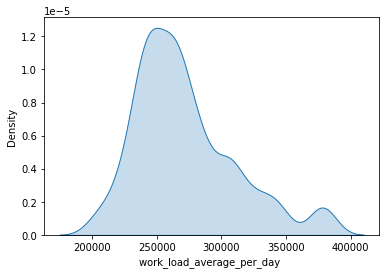

In [11]:
print("Max workload:", df["work_load_average_per_day "].max())
print("Min workload:", df["work_load_average_per_day "].min())
sns.kdeplot(df["work_load_average_per_day "], shade=True)

Max BMI: 38
Min BMI: 19
Max height: 196
Min height: 163
Max weight: 108
Min weight: 56


<AxesSubplot:xlabel='body_mass_index', ylabel='Density'>

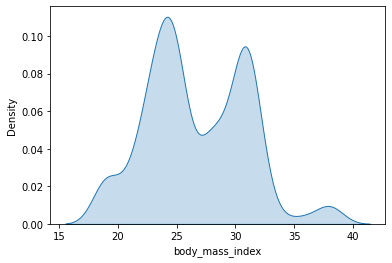

In [12]:
print("Max BMI:", df["body_mass_index"].max())
print("Min BMI:", df["body_mass_index"].min())

print("Max height:", df["height"].max())
print("Min height:", df["height"].min())

print("Max weight:", df["weight"].max())
print("Min weight:", df["weight"].min())

sns.kdeplot(df["body_mass_index"], shade=True)

Some categorical variables are coded as numerical, however, we can recode some of then and build bar charts:

In [13]:
df["day_of_the_week"].value_counts()

Monday       161
Wednesday    156
Tuesday      154
Friday       144
Thursday     125
Name: day_of_the_week, dtype: int64

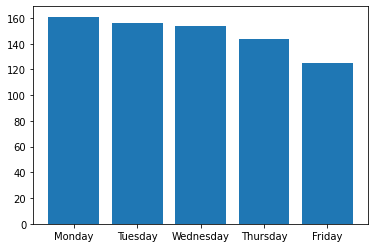

In [14]:
# Create bar chart:
values = [161, 156, 154, 144, 125]
days = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday")

plt.bar(days, values)
plt.show()

In [15]:
df["month_of_absence"].value_counts()

mar    87
feb    72
oct    71
jul    67
may    64
nov    63
jun    54
aug    54
jan    53
apr    53
sep    53
dec    49
Name: month_of_absence, dtype: int64

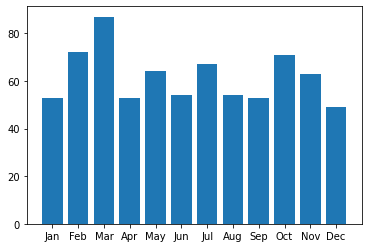

In [16]:
absence_hours = [53, 72, 87, 53, 64, 54, 67, 54, 53, 71, 63, 49]
month = ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

plt.bar(month, absence_hours)
plt.show()

In [17]:
df["hit_target"].value_counts()

93     105
99     102
97      89
92      79
95      75
96      75
98      66
91      45
94      34
88      28
81      19
87      12
100     11
Name: hit_target, dtype: int64

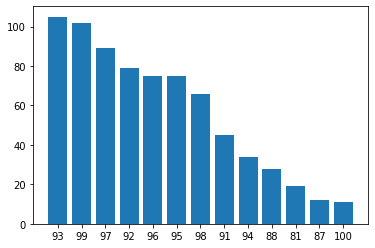

In [18]:
hit = [105, 102, 89, 79, 75, 75, 66, 45, 34, 28, 19, 12, 11]
percent_target = ("93", "99", "97", "92", "96", "95", "98", "91", "94", "88", "81", "87", "100")

plt.bar(percent_target, hit)
plt.show()

In [19]:
df["disciplinary_failure"].value_counts()

0    700
1     40
Name: disciplinary_failure, dtype: int64

Another option for categorical data with fewer categories is to display them in a box-plot as a function of absenteeism time:

<AxesSubplot:xlabel='disciplinary_failure', ylabel='absenteeism_time_in_hours'>

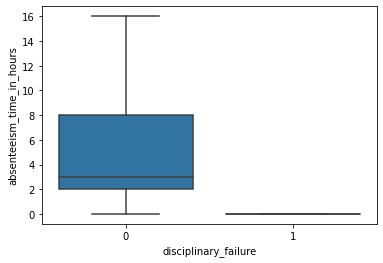

In [20]:
sns.boxplot( x=df["disciplinary_failure"], y=df["absenteeism_time_in_hours"], showfliers = False )

In [21]:
df["education"].value_counts()

1    611
3     79
2     46
4      4
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='absenteeism_time_in_hours'>

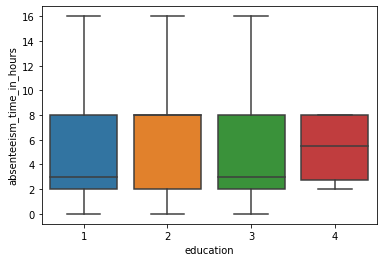

In [22]:
sns.boxplot( x=df["education"], y=df["absenteeism_time_in_hours"], showfliers = False )

In [23]:
print(df["son"].value_counts())
print(df["son"].mean())
print(statistics.pstdev(df["son"]))


0    298
1    229
2    156
4     42
3     15
Name: son, dtype: int64
1.018918918918919
1.0977465462994382


<AxesSubplot:xlabel='son', ylabel='absenteeism_time_in_hours'>

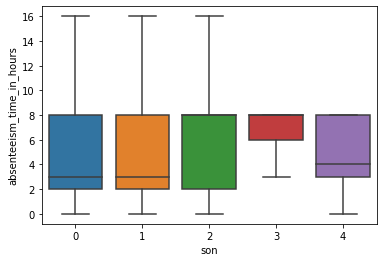

In [24]:
sns.boxplot( x=df["son"], y=df["absenteeism_time_in_hours"], showfliers = False)

In [25]:
df["social_drinker"].value_counts()

1    420
0    320
Name: social_drinker, dtype: int64

<AxesSubplot:xlabel='social_drinker', ylabel='absenteeism_time_in_hours'>

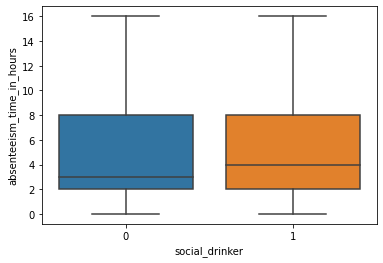

In [26]:
sns.boxplot( x=df["social_drinker"], y=df["absenteeism_time_in_hours"], showfliers = False)

In [27]:
df["social_smoker"].value_counts()

0    686
1     54
Name: social_smoker, dtype: int64

<AxesSubplot:xlabel='social_smoker', ylabel='absenteeism_time_in_hours'>

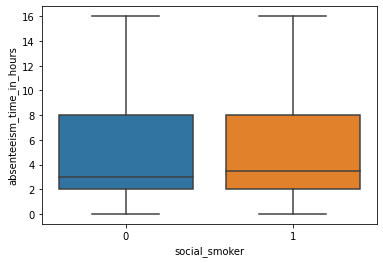

In [28]:
sns.boxplot( x=df["social_smoker"], y=df["absenteeism_time_in_hours"], showfliers = False)

In [29]:
df["pet"].value_counts()

0    460
1    138
2     96
4     32
8      8
5      6
Name: pet, dtype: int64

<AxesSubplot:xlabel='pet', ylabel='absenteeism_time_in_hours'>

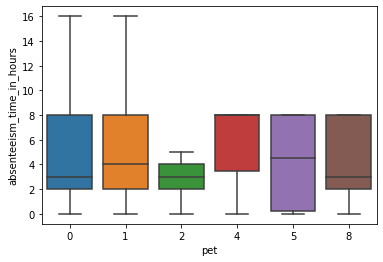

In [30]:
sns.boxplot( x=df["pet"], y=df["absenteeism_time_in_hours"], showfliers = False)

Correlations between variables can be accessed based on expert knowledge (which is not the case for me given the human resources topic), or we can take the easy route and build a correlogram. First we will drop the columns with categorical variables “month_of_absence” and “day_of_the_week:

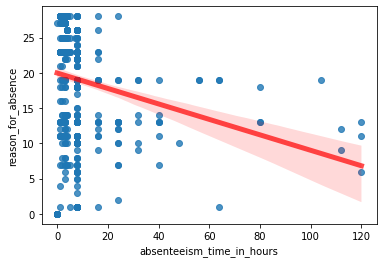

In [31]:
#Correlations between variables:
#Absenteeism and reason for absence:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["reason_for_absence"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

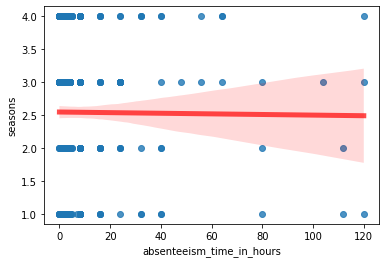

In [32]:
#Absenteeism and seasons:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["seasons"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

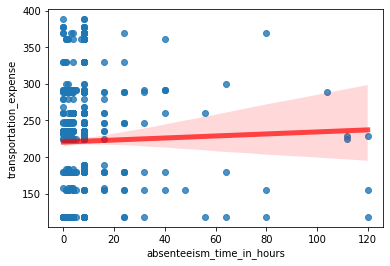

In [33]:
#Absenteeism and transportation expense:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["transportation_expense"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

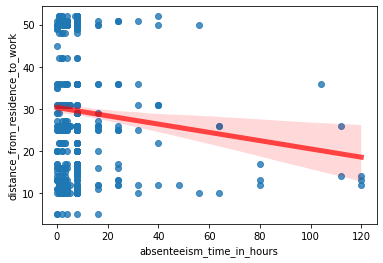

In [34]:
#Absenteeism and distance to work:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["distance_from_residence_to_work"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

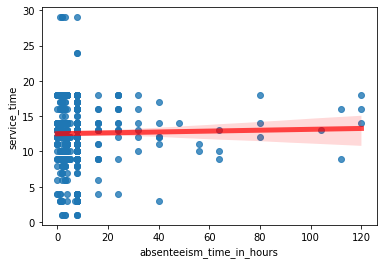

In [35]:
#Absenteeism and service time:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["service_time"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

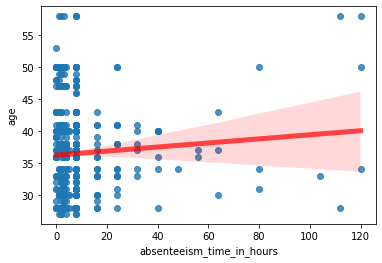

In [36]:
#Absenteeism and age:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["age"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

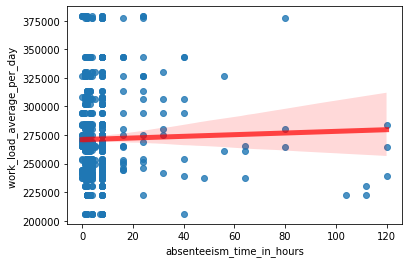

In [37]:
#Absenteeism and workload:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["work_load_average_per_day "], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

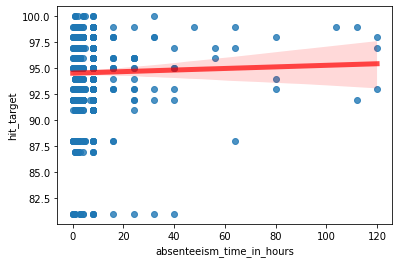

In [38]:
#Absenteeism and hit target:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["hit_target"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

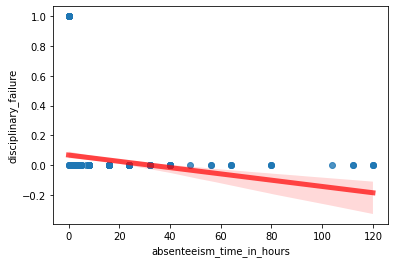

In [39]:
#Absenteeism and disciplinary failure:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["disciplinary_failure"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

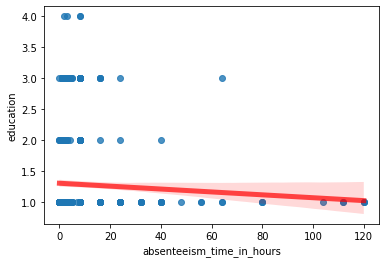

In [40]:
#Absenteeism and education:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["education"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

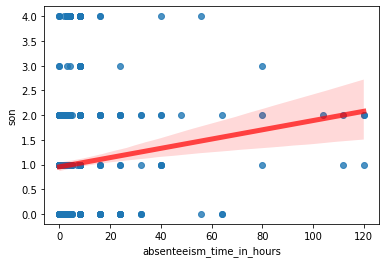

In [41]:
#Absenteeism and son:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["son"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

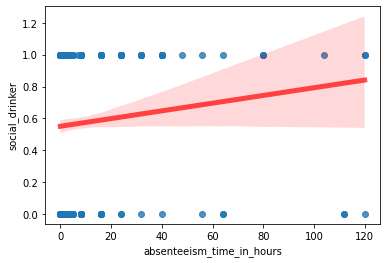

In [42]:
#Absenteeism and social drinker:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["social_drinker"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

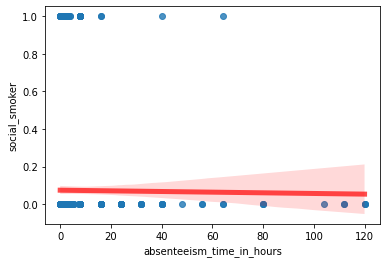

In [43]:
#Absenteeism and social smoker:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["social_smoker"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

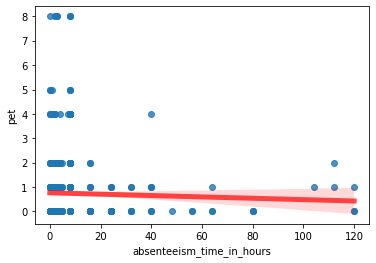

In [44]:
#Absenteeism and pet:
sns.regplot(x=df["absenteeism_time_in_hours"], y=df["pet"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

<AxesSubplot:>

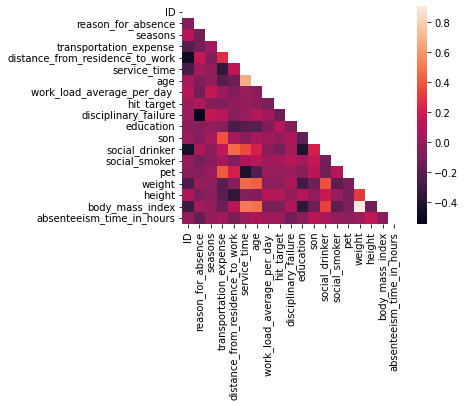

In [45]:
df_1 = df.drop("month_of_absence", axis="columns")
df_2 = df_1.drop("day_of_the_week", axis="columns")

# Calculate correlation between each pair of variable
corr_matrix=df_2.corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, square=True)

# **Absence Time during the year:**

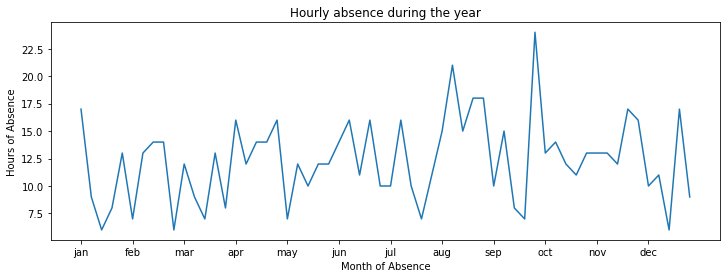

In [46]:

fig, ax = plt.subplots(figsize=(12, 4))
week_demand = df.groupby(["month_of_absence", "day_of_the_week"]).count()["absenteeism_time_in_hours"]
week_demand.plot(ax=ax)
_ = ax.set(
    title="Hourly absence during the year",
    xticks=[i * 5 for i in range(12)], 
    xticklabels=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    xlabel="Month of Absence",
    ylabel="Hours of Absence",
)

# **Dataset split and variable definition**

As in other Machine Learning projects, we need to split the data into train and test sub-samples. For Dataset split we will use the TimeSeriesSplit function from SciKit-Learn, with 5 splits with increasing number in the training set. This allows cross-validation with the previous set, and therefore lower bias. We will let the function automatically chose the size of each set.

In [47]:
from sklearn.model_selection import TimeSeriesSplit

In [48]:
ts_cv = TimeSeriesSplit(
    n_splits=5,  #Number of splits used
    #gap=0,  #Time between one split and another (1 day)
    max_train_size=None, #Train sample size
    #test_size=None, #Test sample size
)

In [49]:
y = df["absenteeism_time_in_hours"] / df["absenteeism_time_in_hours"].max()

To define the predictive (X) and predicting (y) variables we will need to drop the “absenteeism_time_in_hours” column from our table:

In [50]:
X = df.drop("absenteeism_time_in_hours", axis="columns")

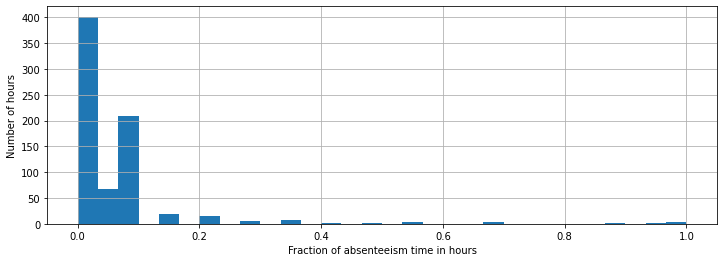

In [51]:
fig, ax = plt.subplots(figsize=(12, 4))
y.hist(bins=30, ax=ax)
_ = ax.set(
    xlabel="Fraction of absenteeism time in hours",
    ylabel="Number of hours",
)

In [52]:
#An we can inspect our 5 splits to see how they look like:

all_splits = list(ts_cv.split(X, y))

In [53]:
train_0, test_0 = all_splits[0]
X.iloc[test_0]
X.iloc[train_0]

,ID,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_per_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index
0,34,19,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
1,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
2,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
3,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
4,34,19,jan,Monday,2,118,10,10,37,330061,100,0,1,0,0,0,0,83,172,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,24,9,sep,Monday,1,246,25,16,41,294217,81,0,1,0,1,0,0,67,170,23
121,15,7,sep,Monday,4,291,31,12,40,294217,81,0,1,1,1,0,1,73,171,25
122,3,13,sep,Monday,4,179,51,18,38,294217,81,0,1,0,1,0,0,89,170,31
123,3,23,sep,Monday,1,179,51,18,38,261756,87,0,1,0,1,0,0,89,170,31


In [54]:
train_1, test_1 = all_splits[1]
X.iloc[test_1]
X.iloc[train_1]

,ID,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_per_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index
0,34,19,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
1,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
2,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
3,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
4,34,19,jan,Monday,2,118,10,10,37,330061,100,0,1,0,0,0,0,83,172,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,11,23,aug,Tuesday,1,289,36,13,33,205917,92,0,1,2,1,0,1,90,172,30
244,11,24,aug,Tuesday,1,289,36,13,33,205917,92,0,1,2,1,0,1,90,172,30
245,9,18,aug,Tuesday,1,228,14,16,58,265615,94,0,1,2,0,0,1,65,172,22
246,11,23,aug,Tuesday,1,289,36,13,33,265615,94,0,1,2,1,0,1,90,172,30


In [55]:
train_2, test_2 = all_splits[2]
X.iloc[test_2]
X.iloc[train_2]

,ID,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_per_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index
0,34,19,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
1,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
2,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
3,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
4,34,19,jan,Monday,2,118,10,10,37,330061,100,0,1,0,0,0,0,83,172,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,23,19,apr,Wednesday,3,378,49,11,36,326452,96,0,1,2,0,1,4,65,174,21
367,3,28,apr,Wednesday,3,179,51,18,38,239409,98,0,1,0,1,0,0,89,170,31
368,18,23,apr,Wednesday,3,330,16,4,28,239409,98,0,2,0,0,0,0,84,182,25
369,3,28,apr,Wednesday,3,179,51,18,38,239409,98,0,1,0,1,0,0,89,170,31


In [56]:
train_3, test_3 = all_splits[3]
X.iloc[test_3]
X.iloc[train_3]

,ID,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_per_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index
0,34,19,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
1,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
2,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
3,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
4,34,19,jan,Monday,2,118,10,10,37,330061,100,0,1,0,0,0,0,83,172,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,22,27,feb,Thursday,2,179,26,9,30,264249,97,0,3,0,0,0,0,56,171,19
490,3,27,feb,Thursday,2,179,51,18,38,264249,97,0,1,0,1,0,0,89,170,31
491,28,25,feb,Thursday,2,225,26,9,28,264249,97,0,1,1,0,0,2,69,169,24
492,22,13,feb,Thursday,2,179,26,9,30,264249,97,0,3,0,0,0,0,56,171,19


In [57]:
train_4, test_4 = all_splits[4]
X.iloc[test_4]
X.iloc[train_4]

,ID,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_per_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index
0,34,19,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
1,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
2,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
3,34,27,jan,Monday,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
4,34,19,jan,Monday,2,118,10,10,37,330061,100,0,1,0,0,0,0,83,172,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,3,27,feb,Friday,2,179,51,18,38,251818,96,0,1,0,1,0,0,89,170,31
613,29,28,feb,Friday,2,225,15,15,41,264249,97,0,4,2,1,0,2,94,182,28
614,3,27,feb,Friday,2,179,51,18,38,264249,97,0,1,0,1,0,0,89,170,31
615,17,23,feb,Friday,2,179,22,17,40,264249,97,0,2,2,0,1,0,63,170,22


# **Predictive Modelling with Gradient Boosting**

Gradient Boosting is a Machine Learning technique which is often used to overcome high dimensional sparse data. The main idea behind Gradient boosting is to perform a sequential tree growing on the training data. This process produces an ensemble of trees and each tree in the ensemble can be built using Gradient boosting, and in turn can learn from the previous tree in the ensemble. The next tree in the ensemble can be created with a different set of the features, and each tree in the ensemble will be the best performing in terms of classification.

Gradient Boosting can also handle multi-class classification tasks, which is the case of numerical and categorical variables that we have in our workable example. To build the model:

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate

Before we start with the first model, we need to do two more things: encode the categorical variables “month_of_absence” and “day_of_the_week”:

In [59]:
categorical_columns = [
    "month_of_absence",
    "day_of_the_week",
]
categories = [
    ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"],
]
ordinal_encoder = OrdinalEncoder(categories=categories)


gbrt_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", ordinal_encoder, categorical_columns),
        ],
        remainder="passthrough",
    ),
    HistGradientBoostingRegressor(

    ),
)

In [60]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


evaluate(gbrt_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.054 +/- 0.017
Root Mean Squared Error: 0.107 +/- 0.042


Not bad, we can see that we have an error between 4% and 7%.

# **Predictive Modeling with Naive linear regression**
The next model is Naive Linear Regression. Naive linear regression can be used to model the relationship between a single independent variable and a single dependent variable. It is represented by the famous formula:
`y = m.x+b`

This model consists of a line that fits through the data points. The regression coefficients represent how each independent variable affects the dependent variable, so that a larger coefficient indicates a stronger relationship between the variables. Naive linear regression is a common technique to quickly get an idea of how to predict a response variable based on a few independent variables. However, it does not generalise well to highly dimensional data and often it does not capture important nonlinear relationships.

As we are dealing with a time series, simple linear regression makes sense, because the data points are assumed to be independent observations. In addition, the trend should be accounted for, in other words the trend should be included in the model. Using SciKit-Learn to build the model:

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV
import numpy as np

In [62]:
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
alphas = np.logspace(-6, 6, 25)
naive_linear_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
        ],
        remainder=MinMaxScaler(),
    ),
    RidgeCV(alphas=alphas),
)


evaluate(naive_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.054 +/- 0.012
Root Mean Squared Error: 0.102 +/- 0.040


The results are very similar to Gradient Boosting, with mean absolute error between 4.2% and 6.6%.

# **Prective Modeling with Time-steps as categories**

Time-steps as categories is used for feature selection and subsequent classification in a multivariate statistical learning. This technique works well for a time series containing a low-dimensional trend, as the information about the underlying trend is encoded in the coefficients and the magnitude of the coefficients increases as a function of the temporal distance.
However, it does not perform well on a time series that has strong nonlinear trend as there is no way to separate it from the trend as the regression is forced to zero in the trend. Another limitation of this technique is that the number of features it considers depends on the number of time-steps used for regression.


This technique works well if the duration of the time-series is longer than the duration of the trend. In our dataset we don’t have a defined trend, so this technique should result reasonably well. With do it with the following code:

In [63]:
one_hot_linear_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
            ("one_hot_time", one_hot_encoder, ["month_of_absence", "day_of_the_week"]),
        ],
        remainder=MinMaxScaler(),
    ),
    RidgeCV(alphas=alphas),
)

evaluate(one_hot_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.056 +/- 0.012
Root Mean Squared Error: 0.103 +/- 0.040


The mean absolute error varies between 4.4% and 6.8%.


# **Trigonometric features**

A trigonometric feature is a sequence that is made up of a set of sine (sin) and cosine (cos) waveforms in the time domain. 

If we observe the number of hours of absence during the year (or during the months), we can see that a lines goes up and down like a sin or cos function. Therefore, we can try to model using trigonometric features. We start to define sin and cos transformer functions:

In [64]:
from sklearn.preprocessing import FunctionTransformer

In [65]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

In [66]:
def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

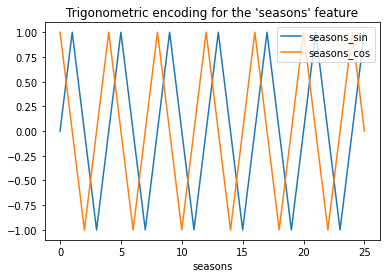

In [67]:
seasons_df = pd.DataFrame(
    np.arange(26).reshape(-1, 1),
    columns=["seasons"],
)
seasons_df["seasons_sin"] = sin_transformer(4).fit_transform(seasons_df)["seasons"]
seasons_df["seasons_cos"] = cos_transformer(4).fit_transform(seasons_df)["seasons"]
seasons_df.plot(x="seasons")
_ = plt.title("Trigonometric encoding for the 'seasons' feature")

Note that we use sin_transformer(4) and cos_transformer(4) because we have four seasons.

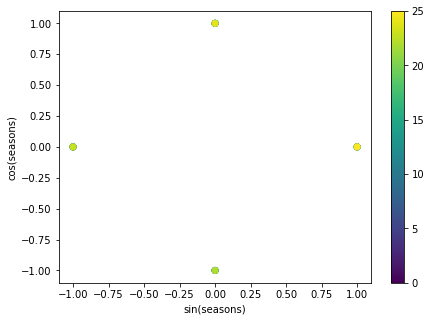

In [68]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(seasons_df["seasons_sin"], seasons_df["seasons_cos"], c=seasons_df["seasons"])
ax.set(
      xlabel="sin(seasons)",
     ylabel="cos(seasons)",
)
_ = fig.colorbar(sp)

In [69]:
#And now we can build the model:

cyclic_cossin_transformer = ColumnTransformer(
    transformers=[
        ("categorical", one_hot_encoder, categorical_columns),
        ("seasons_sin", sin_transformer(4), ["seasons"]),
        ("seasons_cos", cos_transformer(4), ["seasons"]),
    ],
    remainder=MinMaxScaler(),
)

cyclic_cossin_linear_pipeline = make_pipeline(
    cyclic_cossin_transformer,
    RidgeCV(alphas=alphas),
)

evaluate(cyclic_cossin_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.053 +/- 0.013
Root Mean Squared Error: 0.101 +/- 0.041


# **Periodic spline features**
Spline functions are build by joining polynomial functions. The points where the several polynomial functions join together are called knots. Using spline functions instead of a simple polynomial function allows us to keep the grade of the polynomial lower. These type of functions are used when we have a very dynamic dataset for modelling, and we use a knot to model an area, and when the data has significant change in direction the function will assume the next knot.
We will start by defining the spline function:

In [70]:
from sklearn.preprocessing import SplineTransformer

In [71]:
def periodic_spline_transformer(period, n_splines=None, degree=3):
    if n_splines is None:
        n_splines = period
    n_knots = n_splines + 1  # periodic and include_bias is True
    return SplineTransformer(
        degree=degree,
        n_knots=n_knots,
        knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
        extrapolation="periodic",
        include_bias=True,
    )

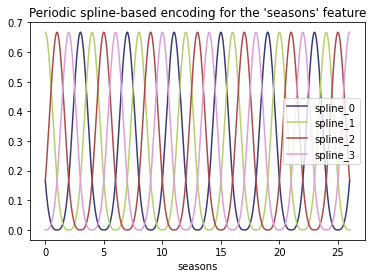

In [72]:
seasons_df = pd.DataFrame(
    np.linspace(0, 26, 1000).reshape(-1, 1),
    columns=["seasons"],
)
splines = periodic_spline_transformer(4, n_splines=4).fit_transform(seasons_df)
splines_df = pd.DataFrame(
    splines,
    columns=[f"spline_{i}" for i in range(splines.shape[1])],
)
pd.concat([seasons_df, splines_df], axis="columns").plot(x="seasons", cmap=plt.cm.tab20b)
_ = plt.title("Periodic spline-based encoding for the 'seasons' feature")

In [73]:
cyclic_spline_transformer = ColumnTransformer(
    transformers=[
        ("categorical", one_hot_encoder, categorical_columns),
        ("cyclic_seasons", periodic_spline_transformer(4, n_splines=4), ["seasons"]),
    ],
    remainder=MinMaxScaler(),
)
cyclic_spline_linear_pipeline = make_pipeline(
    cyclic_spline_transformer,
    RidgeCV(alphas=alphas),
)
evaluate(cyclic_spline_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.053 +/- 0.012
Root Mean Squared Error: 0.101 +/- 0.041


# **Qualitative analysis of the impact of features on linear model predictions**
Now that we have already build five models, it is time to analyse them. We will test for all the 5 splits we have created and obtain a graph for visual inspection.

In [74]:
naive_linear_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
naive_linear_predictions = naive_linear_pipeline.predict(X.iloc[test_0])

one_hot_linear_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
one_hot_linear_predictions = one_hot_linear_pipeline.predict(X.iloc[test_0])

cyclic_cossin_linear_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
cyclic_cossin_linear_predictions = cyclic_cossin_linear_pipeline.predict(X.iloc[test_0])

cyclic_spline_linear_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
cyclic_spline_linear_predictions = cyclic_spline_linear_pipeline.predict(X.iloc[test_0])

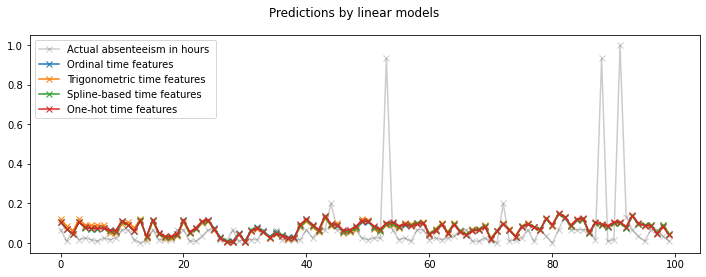

In [75]:
last_days = slice(-100, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by linear models")
ax.plot(
    y.iloc[test_0].values[last_days],
    "x-",
    alpha=0.2,
    label="Actual absenteeism in hours ",
    color="black",
)
ax.plot(naive_linear_predictions[last_days], "x-", label="Ordinal time features")
ax.plot(
    cyclic_cossin_linear_predictions[last_days],
    "x-",
    label="Trigonometric time features",
)
ax.plot(
    cyclic_spline_linear_predictions[last_days],
    "x-",
    label="Spline-based time features",
)
ax.plot(
    one_hot_linear_predictions[last_days],
    "x-",
    label="One-hot time features",
)
_ = ax.legend()

In [76]:
naive_linear_pipeline.fit(X.iloc[train_1], y.iloc[train_1])
naive_linear_predictions = naive_linear_pipeline.predict(X.iloc[test_1])

one_hot_linear_pipeline.fit(X.iloc[train_1], y.iloc[train_1])
one_hot_linear_predictions = one_hot_linear_pipeline.predict(X.iloc[test_1])

cyclic_cossin_linear_pipeline.fit(X.iloc[train_1], y.iloc[train_1])
cyclic_cossin_linear_predictions = cyclic_cossin_linear_pipeline.predict(X.iloc[test_1])

cyclic_spline_linear_pipeline.fit(X.iloc[train_1], y.iloc[train_1])
cyclic_spline_linear_predictions = cyclic_spline_linear_pipeline.predict(X.iloc[test_1])

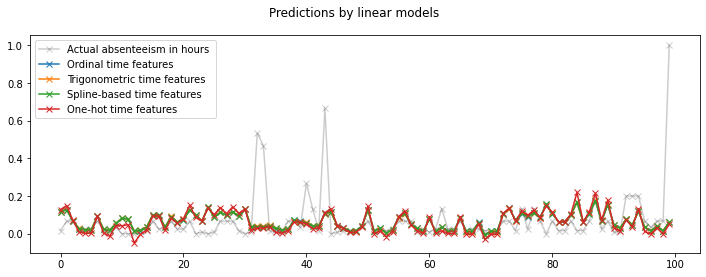

In [77]:
last_days = slice(-100, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by linear models")
ax.plot(
    y.iloc[test_1].values[last_days],
    "x-",
    alpha=0.2,
    label="Actual absenteeism in hours ",
    color="black",
)
ax.plot(naive_linear_predictions[last_days], "x-", label="Ordinal time features")
ax.plot(
    cyclic_cossin_linear_predictions[last_days],
    "x-",
    label="Trigonometric time features",
)
ax.plot(
    cyclic_spline_linear_predictions[last_days],
    "x-",
   label="Spline-based time features",
)
ax.plot(
    one_hot_linear_predictions[last_days],
    "x-",
    label="One-hot time features",
)
_ = ax.legend()

In [78]:
naive_linear_pipeline.fit(X.iloc[train_2], y.iloc[train_2])
naive_linear_predictions = naive_linear_pipeline.predict(X.iloc[test_2])

one_hot_linear_pipeline.fit(X.iloc[train_2], y.iloc[train_2])
one_hot_linear_predictions = one_hot_linear_pipeline.predict(X.iloc[test_2])

cyclic_cossin_linear_pipeline.fit(X.iloc[train_2], y.iloc[train_2])
cyclic_cossin_linear_predictions = cyclic_cossin_linear_pipeline.predict(X.iloc[test_2])

cyclic_spline_linear_pipeline.fit(X.iloc[train_2], y.iloc[train_2])
cyclic_spline_linear_predictions = cyclic_spline_linear_pipeline.predict(X.iloc[test_2])

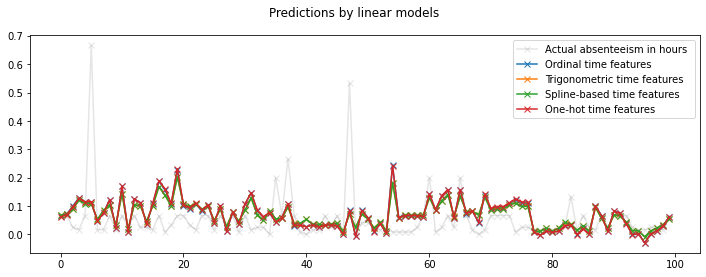

In [79]:
last_days = slice(-100, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by linear models")
ax.plot(
    y.iloc[test_2].values[last_days],
    "x-",
    alpha=0.1,
    label="Actual absenteeism in hours ",
    color="black",
)
ax.plot(naive_linear_predictions[last_days], "x-", label="Ordinal time features")
ax.plot(
    cyclic_cossin_linear_predictions[last_days],
    "x-",
    label="Trigonometric time features",
)
ax.plot(
    cyclic_spline_linear_predictions[last_days],
    "x-",
    label="Spline-based time features",
)
ax.plot(
    one_hot_linear_predictions[last_days],
    "x-",
    label="One-hot time features",
)
_ = ax.legend()

In [80]:
naive_linear_pipeline.fit(X.iloc[train_3], y.iloc[train_3])
naive_linear_predictions = naive_linear_pipeline.predict(X.iloc[test_3])

one_hot_linear_pipeline.fit(X.iloc[train_3], y.iloc[train_3])
one_hot_linear_predictions = one_hot_linear_pipeline.predict(X.iloc[test_3])

cyclic_cossin_linear_pipeline.fit(X.iloc[train_3], y.iloc[train_3])
cyclic_cossin_linear_predictions = cyclic_cossin_linear_pipeline.predict(X.iloc[test_3])

cyclic_spline_linear_pipeline.fit(X.iloc[train_3], y.iloc[train_3])
cyclic_spline_linear_predictions = cyclic_spline_linear_pipeline.predict(X.iloc[test_3])

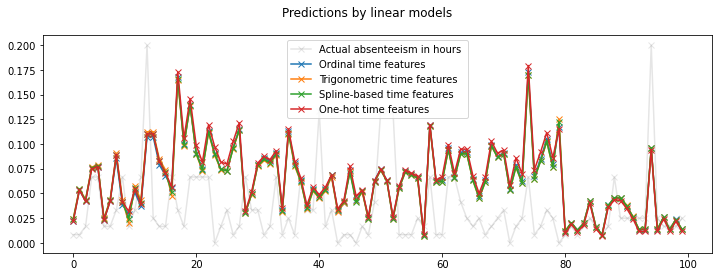

In [81]:
last_days = slice(-100, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by linear models")
ax.plot(
    y.iloc[test_3].values[last_days],
    "x-",
    alpha=0.1,
    label="Actual absenteeism in hours ",
    color="black",
)
ax.plot(naive_linear_predictions[last_days], "x-", label="Ordinal time features")
ax.plot(
    cyclic_cossin_linear_predictions[last_days],
    "x-",
    label="Trigonometric time features",
)
ax.plot(
   cyclic_spline_linear_predictions[last_days],
    "x-",
    label="Spline-based time features",
)
ax.plot(
    one_hot_linear_predictions[last_days],
    "x-",
    label="One-hot time features",
)
_ = ax.legend()

In [82]:
naive_linear_pipeline.fit(X.iloc[train_4], y.iloc[train_4])
naive_linear_predictions = naive_linear_pipeline.predict(X.iloc[test_4])

one_hot_linear_pipeline.fit(X.iloc[train_4], y.iloc[train_4])
one_hot_linear_predictions = one_hot_linear_pipeline.predict(X.iloc[test_4])

cyclic_cossin_linear_pipeline.fit(X.iloc[train_4], y.iloc[train_4])
cyclic_cossin_linear_predictions = cyclic_cossin_linear_pipeline.predict(X.iloc[test_4])

cyclic_spline_linear_pipeline.fit(X.iloc[train_4], y.iloc[train_4])
cyclic_spline_linear_predictions = cyclic_spline_linear_pipeline.predict(X.iloc[test_4])

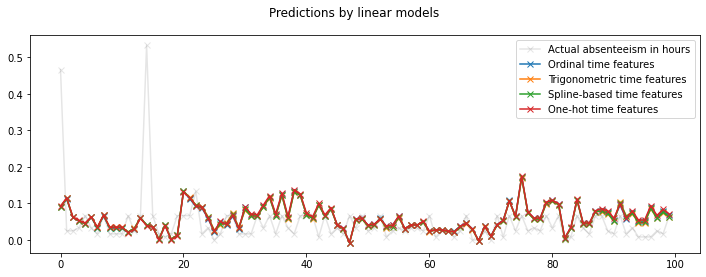

In [83]:
last_days = slice(-100, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by linear models")
ax.plot(
    y.iloc[test_4].values[last_days],
    "x-",
    alpha=0.1,
    label="Actual absenteeism in hours",
    color="black",
)
ax.plot(naive_linear_predictions[last_days], "x-", label="Ordinal time features")
ax.plot(
    cyclic_cossin_linear_predictions[last_days],
    "x-",
    label="Trigonometric time features",
)
ax.plot(
    cyclic_spline_linear_predictions[last_days],
    "x-",
    label="Spline-based time features",
)
ax.plot(
    one_hot_linear_predictions[last_days],
    "x-",
    label="One-hot time features",
)
_ = ax.legend()

##### To obtain the number of features used in each model:

In [84]:
naive_linear_pipeline[:-1].transform(X).shape

(740, 35)

In [85]:
one_hot_linear_pipeline[:-1].transform(X).shape

(740, 52)

In [86]:
cyclic_cossin_linear_pipeline[:-1].transform(X).shape

(740, 36)

In [87]:
cyclic_spline_linear_pipeline[:-1].transform(X).shape

(740, 38)

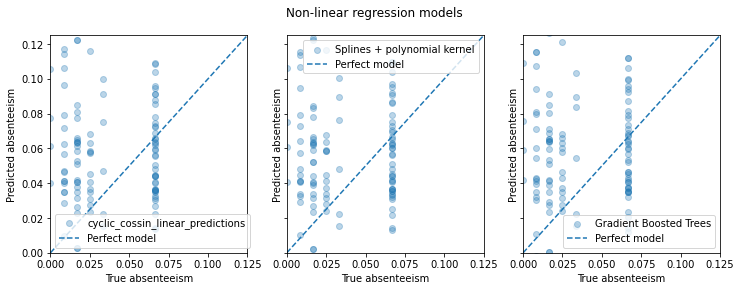

In [88]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    cyclic_cossin_linear_predictions,
    cyclic_spline_linear_predictions,
    one_hot_linear_predictions,
]
labels = [
    "cyclic_cossin_linear_predictions",
    "Splines + polynomial kernel",
    "Gradient Boosted Trees",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_0].values, pred, alpha=0.3, label=label)
    ax.plot([0, 0.125], [0, 0.125], "--", label="Perfect model")
    ax.set(
        xlim=(0, 0.125),
        ylim=(0, 0.125),
        xlabel="True absenteeism",
        ylabel="Predicted absenteeism",
    )
    ax.legend()

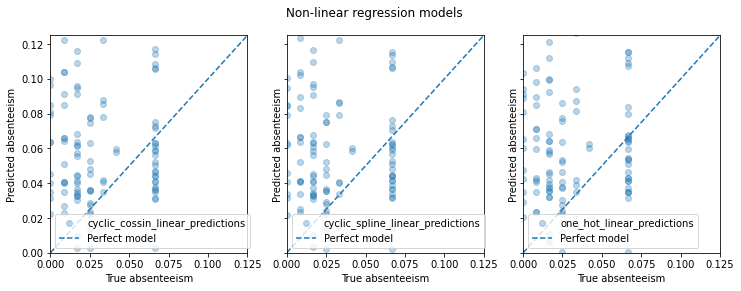

In [89]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    cyclic_cossin_linear_predictions,
    cyclic_spline_linear_predictions,
    one_hot_linear_predictions,
]
labels = [
    "cyclic_cossin_linear_predictions",
    "cyclic_spline_linear_predictions",
    "one_hot_linear_predictions",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_1].values, pred, alpha=0.3, label=label)
    ax.plot([0, 0.125], [0, 0.125], "--", label="Perfect model")
    ax.set(
        xlim=(0, 0.125),
        ylim=(0, 0.125),
        xlabel="True absenteeism",
        ylabel="Predicted absenteeism",
    )
    ax.legend()

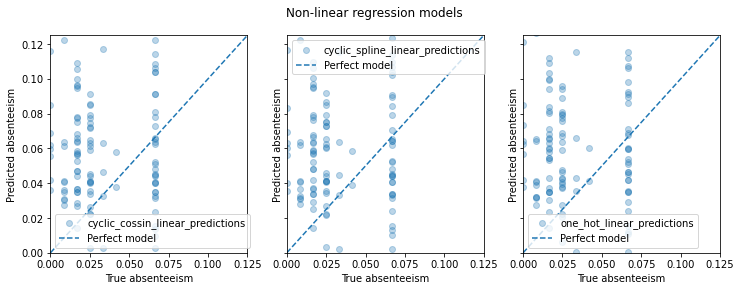

In [90]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    cyclic_cossin_linear_predictions,
    cyclic_spline_linear_predictions,
    one_hot_linear_predictions,
]
labels = [
    "cyclic_cossin_linear_predictions",
    "cyclic_spline_linear_predictions",
    "one_hot_linear_predictions",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_2].values, pred, alpha=0.3, label=label)
    ax.plot([0, 0.125], [0, 0.125], "--", label="Perfect model")
    ax.set(
        xlim=(0, 0.125),
        ylim=(0, 0.125),
        xlabel="True absenteeism",
        ylabel="Predicted absenteeism",
    )
    ax.legend()

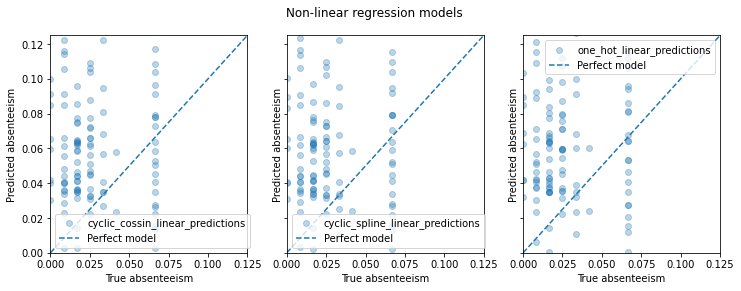

In [91]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    cyclic_cossin_linear_predictions,
    cyclic_spline_linear_predictions,
    one_hot_linear_predictions,
]
labels = [
    "cyclic_cossin_linear_predictions",
    "cyclic_spline_linear_predictions",
    "one_hot_linear_predictions",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_3].values, pred, alpha=0.3, label=label)
    ax.plot([0, 0.125], [0, 0.125], "--", label="Perfect model")
    ax.set(
        xlim=(0, 0.125),
        ylim=(0, 0.125),
        xlabel="True absenteeism",
        ylabel="Predicted absenteeism",
    )
    ax.legend()

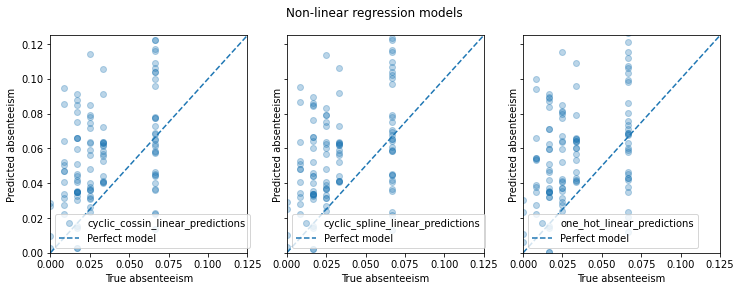

In [92]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    cyclic_cossin_linear_predictions,
    cyclic_spline_linear_predictions,
    one_hot_linear_predictions,
]
labels = [
    "cyclic_cossin_linear_predictions",
    "cyclic_spline_linear_predictions",
    "one_hot_linear_predictions",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_4].values, pred, alpha=0.3, label=label)
    ax.plot([0, 0.125], [0, 0.125], "--", label="Perfect model")
    ax.set(
        xlim=(0, 0.125),
        ylim=(0, 0.125),
        xlabel="True absenteeism",
        ylabel="Predicted absenteeism",
    )
    ax.legend()

# **Modeling pairwise interactions with splines and polynomial features**
Modelling Pairwise Interactions with splines and polynomial features
I know it’s been a long work so far, however, if we are not satisfied with the obtained results we can try to improve it interactions models. In this example I will try an interaction between seasons and disciplinary failre, however you can try multiple interactions with your data and check which one performs better.

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import FeatureUnion

In [94]:
#Interaction between seasons and month:

seasons_month_interaction = make_pipeline(
    ColumnTransformer(
        [
            ("cyclic_seasons", periodic_spline_transformer(4, n_splines=4), ["seasons"]),
            ("disciplinary_failure", FunctionTransformer(), ["disciplinary_failure"]),
        ]
    ),
    PolynomialFeatures(degree=2, interaction_only=False, include_bias=False),
)

In [95]:
cyclic_spline_interactions_pipeline = make_pipeline(
    FeatureUnion(
        [
            #("marginal", cyclic_spline_transformer),
            ("interactions", seasons_month_interaction),
        ]
    ),
    RidgeCV(alphas=alphas),
)


evaluate(cyclic_spline_interactions_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.059 +/- 0.020
Root Mean Squared Error: 0.102 +/- 0.046


# **Modeling non-linear feature interactions with kernels**
Another option is to use kernels. Kernels are a way to transform a function that is not linear, into a linear form that can then be computed without data loss. Kernels can be used in two different ways: one by o find an alignment of the data that makes possible the comparison between series, and the other by changing the structure of the data by constructing a higher level representation of it and the comparison is performed using this new representation.

In [96]:
from sklearn.kernel_approximation import Nystroem

In [97]:
cyclic_spline_poly_pipeline = make_pipeline(
    cyclic_spline_transformer,
    Nystroem(kernel="poly", degree=2, n_components=300, random_state=0),
    RidgeCV(alphas=alphas),
)

evaluate(cyclic_spline_poly_pipeline, X, y, cv=ts_cv)

C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\kernel_approximation.py:885: UserWarning: n_components > n_samples. This is not possible.
n_components was set to n_samples, which results in inefficient evaluation of the full kernel.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\kernel_approximation.py:885: UserWarning: n_components > n_samples. This is not possible.
n_components was set to n_samples, which results in inefficient evaluation of the full kernel.
  warnings.warn(


Mean Absolute Error:     0.054 +/- 0.012
Root Mean Squared Error: 0.102 +/- 0.040


In [98]:
one_hot_poly_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
            ("one_hot_time", one_hot_encoder, ["month_of_absence", "day_of_the_week"]),
        ],
        remainder="passthrough",
    ),
    Nystroem(kernel="poly", degree=2, n_components=300, random_state=0),
    RidgeCV(alphas=alphas),
)

evaluate(one_hot_poly_pipeline, X, y, cv=ts_cv)

C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\kernel_approximation.py:885: UserWarning: n_components > n_samples. This is not possible.
n_components was set to n_samples, which results in inefficient evaluation of the full kernel.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\kernel_approximation.py:885: UserWarning: n_components > n_samples. This is not possible.
n_components was set to n_samples, which results in inefficient evaluation of the full kernel.
  warnings.warn(


Mean Absolute Error:     0.064 +/- 0.017
Root Mean Squared Error: 0.109 +/- 0.042


In [99]:
gbrt_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
gbrt_predictions = gbrt_pipeline.predict(X.iloc[test_0])

one_hot_poly_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
one_hot_poly_predictions = one_hot_poly_pipeline.predict(X.iloc[test_0])

cyclic_spline_poly_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
cyclic_spline_poly_predictions = cyclic_spline_poly_pipeline.predict(X.iloc[test_0])

C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\kernel_approximation.py:885: UserWarning: n_components > n_samples. This is not possible.
n_components was set to n_samples, which results in inefficient evaluation of the full kernel.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\kernel_approximation.py:885: UserWarning: n_components > n_samples. This is not possible.
n_components was set to n_samples, which results in inefficient evaluation of the full kernel.
  warnings.warn(


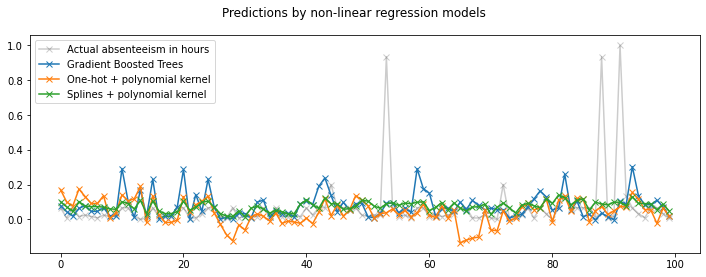

In [100]:
last_hours = slice(-100, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by non-linear regression models")
ax.plot(
    y.iloc[test_0].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual absenteeism in hours",
    color="black",
)
ax.plot(
    gbrt_predictions[last_hours],
    "x-",
    label="Gradient Boosted Trees",
)
ax.plot(
    one_hot_poly_predictions[last_hours],
    "x-",
    label="One-hot + polynomial kernel",
)
ax.plot(
    cyclic_spline_poly_predictions[last_hours],
    "x-",
    label="Splines + polynomial kernel",
)
_ = ax.legend()

In [101]:
gbrt_pipeline.fit(X.iloc[train_1], y.iloc[train_1])
gbrt_predictions = gbrt_pipeline.predict(X.iloc[test_1])

one_hot_poly_pipeline.fit(X.iloc[train_1], y.iloc[train_1])
one_hot_poly_predictions = one_hot_poly_pipeline.predict(X.iloc[test_1])

cyclic_spline_poly_pipeline.fit(X.iloc[train_1], y.iloc[train_1])
cyclic_spline_poly_predictions = cyclic_spline_poly_pipeline.predict(X.iloc[test_1])

C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\kernel_approximation.py:885: UserWarning: n_components > n_samples. This is not possible.
n_components was set to n_samples, which results in inefficient evaluation of the full kernel.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\kernel_approximation.py:885: UserWarning: n_components > n_samples. This is not possible.
n_components was set to n_samples, which results in inefficient evaluation of the full kernel.
  warnings.warn(


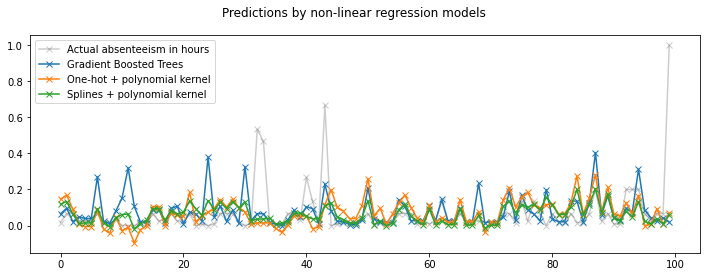

In [102]:
last_hours = slice(-100, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by non-linear regression models")
ax.plot(
    y.iloc[test_1].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual absenteeism in hours",
    color="black",
)
ax.plot(
    gbrt_predictions[last_hours],
    "x-",
    label="Gradient Boosted Trees",
)
ax.plot(
    one_hot_poly_predictions[last_hours],
    "x-",
    label="One-hot + polynomial kernel",
)
ax.plot(
    cyclic_spline_poly_predictions[last_hours],
    "x-",
    label="Splines + polynomial kernel",
)
_ = ax.legend()

In [103]:
gbrt_pipeline.fit(X.iloc[train_2], y.iloc[train_2])
gbrt_predictions = gbrt_pipeline.predict(X.iloc[test_2])

one_hot_poly_pipeline.fit(X.iloc[train_2], y.iloc[train_2])
one_hot_poly_predictions = one_hot_poly_pipeline.predict(X.iloc[test_2])

cyclic_spline_poly_pipeline.fit(X.iloc[train_2], y.iloc[train_2])
cyclic_spline_poly_predictions = cyclic_spline_poly_pipeline.predict(X.iloc[test_2])

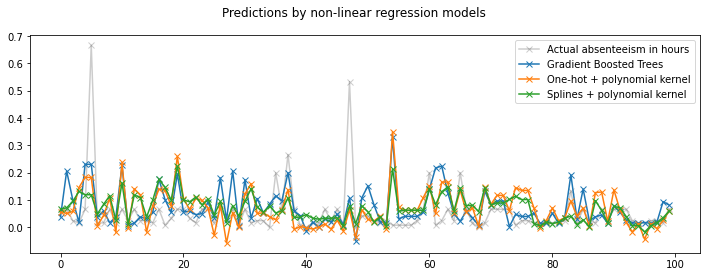

In [104]:
last_hours = slice(-100, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by non-linear regression models")
ax.plot(
    y.iloc[test_2].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual absenteeism in hours",
    color="black",
)
ax.plot(
    gbrt_predictions[last_hours],
    "x-",
    label="Gradient Boosted Trees",
)
ax.plot(
    one_hot_poly_predictions[last_hours],
    "x-",
    label="One-hot + polynomial kernel",
)
ax.plot(
    cyclic_spline_poly_predictions[last_hours],
    "x-",
    label="Splines + polynomial kernel",
)
_ = ax.legend()

In [105]:
gbrt_pipeline.fit(X.iloc[train_3], y.iloc[train_3])
gbrt_predictions = gbrt_pipeline.predict(X.iloc[test_3])

one_hot_poly_pipeline.fit(X.iloc[train_3], y.iloc[train_3])
one_hot_poly_predictions = one_hot_poly_pipeline.predict(X.iloc[test_3])

cyclic_spline_poly_pipeline.fit(X.iloc[train_3], y.iloc[train_3])
cyclic_spline_poly_predictions = cyclic_spline_poly_pipeline.predict(X.iloc[test_3])

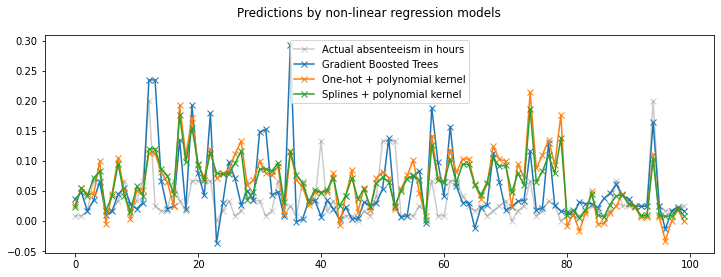

In [106]:
last_hours = slice(-100, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by non-linear regression models")
ax.plot(
    y.iloc[test_3].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual absenteeism in hours",
    color="black",
)
ax.plot(
    gbrt_predictions[last_hours],
    "x-",
    label="Gradient Boosted Trees",
)
ax.plot(
    one_hot_poly_predictions[last_hours],
    "x-",
    label="One-hot + polynomial kernel",
)
ax.plot(
    cyclic_spline_poly_predictions[last_hours],
    "x-",
    label="Splines + polynomial kernel",
)
_ = ax.legend()

In [107]:
gbrt_pipeline.fit(X.iloc[train_4], y.iloc[train_4])
gbrt_predictions = gbrt_pipeline.predict(X.iloc[test_4])

one_hot_poly_pipeline.fit(X.iloc[train_4], y.iloc[train_4])
one_hot_poly_predictions = one_hot_poly_pipeline.predict(X.iloc[test_4])

cyclic_spline_poly_pipeline.fit(X.iloc[train_4], y.iloc[train_4])
cyclic_spline_poly_predictions = cyclic_spline_poly_pipeline.predict(X.iloc[test_4])

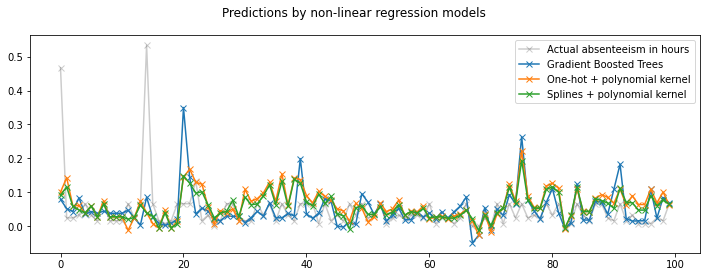

In [108]:
last_hours = slice(-100, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by non-linear regression models")
ax.plot(
    y.iloc[test_4].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual absenteeism in hours",
    color="black",
)
ax.plot(
    gbrt_predictions[last_hours],
    "x-",
    label="Gradient Boosted Trees",
)
ax.plot(
    one_hot_poly_predictions[last_hours],
    "x-",
    label="One-hot + polynomial kernel",
)
ax.plot(
    cyclic_spline_poly_predictions[last_hours],
    "x-",
    label="Splines + polynomial kernel",
)
_ = ax.legend()

# **Model evaluation**

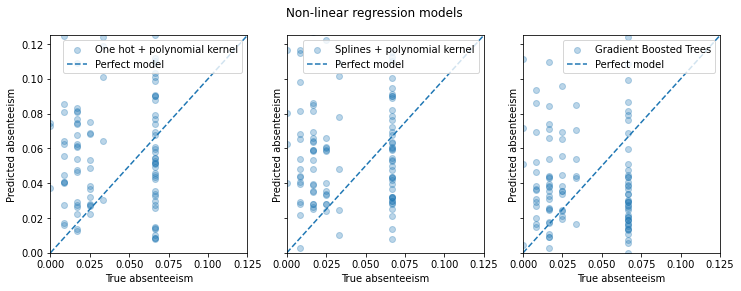

In [109]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    one_hot_poly_predictions,
    cyclic_spline_poly_predictions,
    gbrt_predictions,
]
labels = [
    "One hot + polynomial kernel",
    "Splines + polynomial kernel",
    "Gradient Boosted Trees",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_0].values, pred, alpha=0.3, label=label)
    ax.plot([0, 0.125], [0, 0.125], "--", label="Perfect model")
    ax.set(
        xlim=(0, 0.125),
        ylim=(0, 0.125),
        xlabel="True absenteeism",
        ylabel="Predicted absenteeism",
    )
    ax.legend()

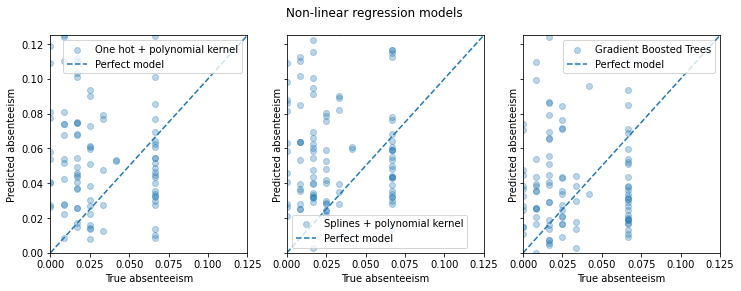

In [110]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    one_hot_poly_predictions,
    cyclic_spline_poly_predictions,
    gbrt_predictions,
]
labels = [
    "One hot + polynomial kernel",
    "Splines + polynomial kernel",
    "Gradient Boosted Trees",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_1].values, pred, alpha=0.3, label=label)
    ax.plot([0, 0.125], [0, 0.125], "--", label="Perfect model")
    ax.set(
        xlim=(0, 0.125),
        ylim=(0, 0.125),
        xlabel="True absenteeism",
        ylabel="Predicted absenteeism",
    )
    ax.legend()

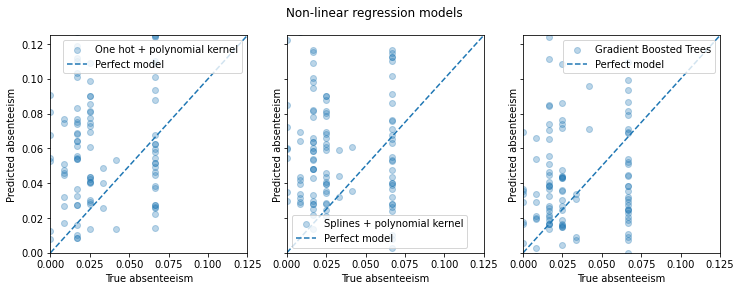

In [111]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    one_hot_poly_predictions,
    cyclic_spline_poly_predictions,
    gbrt_predictions,
]
labels = [
    "One hot + polynomial kernel",
    "Splines + polynomial kernel",
    "Gradient Boosted Trees",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_2].values, pred, alpha=0.3, label=label)
    ax.plot([0, 0.125], [0, 0.125], "--", label="Perfect model")
    ax.set(
        xlim=(0, 0.125),
        ylim=(0, 0.125),
        xlabel="True absenteeism",
        ylabel="Predicted absenteeism",
    )
    ax.legend()

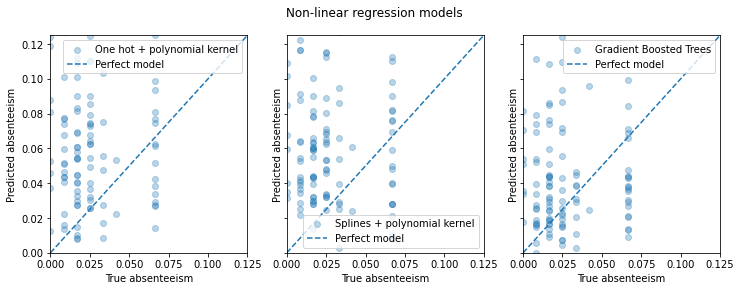

In [112]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    one_hot_poly_predictions,
    cyclic_spline_poly_predictions,
    gbrt_predictions,
]
labels = [
    "One hot + polynomial kernel",
    "Splines + polynomial kernel",
    "Gradient Boosted Trees",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_3].values, pred, alpha=0.3, label=label)
    ax.plot([0, 0.125], [0, 0.125], "--", label="Perfect model")
    ax.set(
        xlim=(0, 0.125),
        ylim=(0, 0.125),
        xlabel="True absenteeism",
        ylabel="Predicted absenteeism",
    )
    ax.legend()

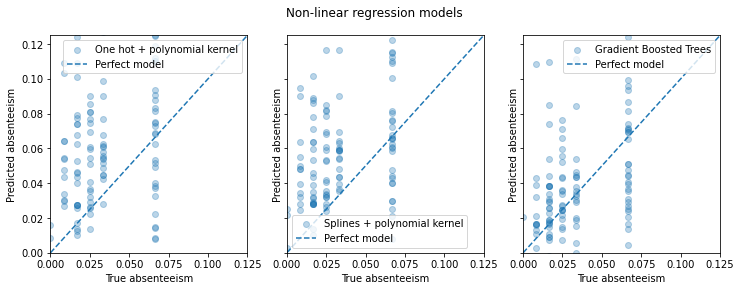

In [113]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    one_hot_poly_predictions,
    cyclic_spline_poly_predictions,
    gbrt_predictions,
]
labels = [
    "One hot + polynomial kernel",
    "Splines + polynomial kernel",
    "Gradient Boosted Trees",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_4].values, pred, alpha=0.3, label=label)
    ax.plot([0, 0.125], [0, 0.125], "--", label="Perfect model")
    ax.set(
        xlim=(0, 0.125),
        ylim=(0, 0.125),
        xlabel="True absenteeism",
        ylabel="Predicted absenteeism",
    )
    ax.legend()